<a href="https://colab.research.google.com/github/NVietAnh010801/nh-ndi-nkhu-nm-t/blob/main/BT_10MonAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


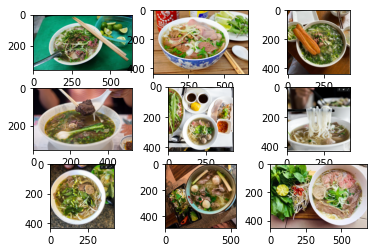

In [15]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Monan/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'phobo.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [17]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Colab Notebooks/Monan/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('phobo'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhxeo'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banhmi'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Bunbo'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('buncha'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('bunrieu'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('caolau'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('comga'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('goicuon'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('oc'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(16, 200, 200, 3) (16,)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 436.2263 - accuracy: 0.0625
Epoch 2/50
1/1 [==============================] - 0s 70ms/step - loss: 5554.1177 - accuracy: 0.5625
Epoch 3/50
1/1 [==============================] - 0s 67ms/step - loss: 6612.2344 - accuracy: 0.0625
Epoch 4/50
1/1 [==============================] - 0s 64ms/step - loss: 1351.8530 - accuracy: 0.5625
Epoch 5/50
1/1 [==============================] - 0s 63ms/step - loss: 1563.4451 - accuracy: 0.0625
Epoch 6/50
1/1 [==============================] - 0s 64ms/step - loss: 744.0821 - accuracy: 0.1875
Epoch 7/50
1/1 [==============================] - 0s 68ms/step - loss: 471.4261 - accuracy: 0.6250
Epoch 8/50
1/1 [==============================] - 0s 65ms/step - loss: 328.7992 - accuracy: 0.5625
Epoch 9/50
1/1 [==============================] - 0s 65ms/step - loss: 122.0585 - accuracy: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 65ms/step - loss: 17.3847 - accuracy: 0.8125
Epoch 

In [20]:
model.evaluate(photos,labels)

1/1 [==============================] - 0s 200ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [21]:
model.save('10Foods_Final.h5')

In [22]:
from keras.models import load_model
models=load_model('10Foods_Final.h5')

In [23]:
classes = ["phobo","banhxeo","Banhmi","bunbo","buncha","bunrieu","caolau","comga","goicuon","oc"]

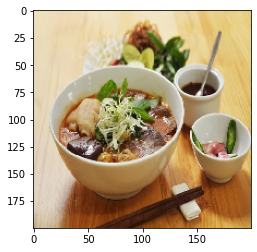

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/Colab Notebooks/Monan/bunbo.jpg', target_size=(200,200))
plt.imshow(img)

In [27]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.03859853 0.08887795 0.01743502 0.07651751 0.05310185 0.06940904
  0.09247645 0.12844607 0.27855518 0.15658236]]


'goicuon'